# Lesson 02: Stream power

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 04/09/2020*

Now that we have seen the basic form of channel profiles (see Lesson 1), we can start thinking about what might cause this form.

Nearly two hundred years ago, there was something of a raging debate as to whether or not rivers could carve valleys. In Europe, one of the groups that promoted this idea was the "Edinburgh" school, which was based out of the Scottish Branch of the British Geological Survey, led, at the time, by Archibald Geikie. The impact of rivers on our post-glacial landscapes was perhaps not so obvious, but a rivers' power to erode the landscape is quite obvious if you travel along the Grand Canyon in the United States. 

Both the first and second directors of the United States Geological Surveys made observations in the canyons of the western states that helped convince others that rivers did indeed drive valley incision. The second director, G.K. Gilbert, wrote a highly influential report on the Geology of the Henry Mountains (a range in Utah) that not only contributed to a number of geophysical ideas (isostasy, for one), but also contained a chapter on erosion that expounded on erosion of channels by water. 

Gilbert, G.K., 1877. Geology of the Henry Mountains (USGS Unnumbered Series), Geology of the Henry Mountains, Monograph. Government Printing Office, Washington, D.C. https://doi.org/10.3133/70038096

You can get this report online. Every geomorphologist should read chapter 5. In fact, if you haven't read it, stop reading this and read that chapter. I'll wait. 

Okay, finished? Great. Gilbert's chapter is modern. What I mean by that is his approach and his speculations would not seem out of place in a paper appearing today. If you look at other papers from this paper they can seem quite datad. Gilbert was far ahead of his time. Which is particularly notable because his approach to things fell out of favour for a number of decades and didn't really find traction again until the late 50s and early 60s (With the exception of the, uh, exceptional papers by R.E. Horton in the 30s and 40s, but we won't get into those here). 

Gilbert says on page 115: "We have already seen that erosion is favoured by declivity. Where the declivity is great the agents of erosion are powerful; where it is small they are weak; where there is no declivity they are powerless. Moreover it has been shown that their power increases with the declivity in more than simple
ratio.” That last bit means that the relationship between declivity (we would say gradient) and erosion rate is *nonlinear*.  

We can also suppose that erosion is favoured when there is more water. And to get more water, you need more drainage area. We can state this in a very simple equation, which is exactly what Howard and Kirby did in 1983:

$E = k A^m S^n$

where $E$ is the erosion rate, $A$ is drainage area, $S$ is channel gradient, $m$ and $n$ are empirical coefficients, and $k$ is a lumped "erodibility" that is a Pandora's box of complexity.  

The equation above is often called the "stream power law". It is a *MASSIVE* oversimplification of what happens during river incision. It is oversimplified to the degree that many geomorphologists think it is obscene. But it is a useful conceptual model that has helped informed many studies. There are a number of studies showing that in the right circumstances, it can be used to understand how channels evolve. So we are going to use it here. 

## Stream power warning labels

* Stream power is designed for channels that incise through bedrock. If the channel is alluvial (that is, its bed and banks are made of sediment, even in the biggest floods), then stream power does not apply.
* In reality, river incision into bedrock depends on many factors. With a few exceptions, water alone does not erode the bed, so more advanced incision rules include sediment supply. 
* Usually, small discharges don't really modify the bed: you need to get beyond a threshold discharge to incise. So more advanced incision laws take this into accout. 
* Stream power is used mainly because it is convinient rather than because it accurately describes any physical process.

With those caveats, said, there is some good news:
* It occasionally works (e.g., Lague, 2014; Schwanghart and Scherler 2020, although the Lague paper also has examples of where it doesn't work). 
* Lots of nasty thresholding behaviour (e.g., sediment cover thresholds, discharge thresholds for incision) can be mimiced by altering the $n$ exponent (see Gasparini and Brandon, 2011). 

Gasparini, N.M., Brandon, M.T., 2011. A generalized power law approximation for fluvial incision of bedrock channels. Journal of Geophysical Research: Earth Surface 116. https://doi.org/10.1029/2009JF001655

Lague, D., 2014. The stream power river incision model: Evidence, theory and beyond. Earth Surface Processes and Landforms 39, 38–61. https://doi.org/10.1002/esp.3462

Schwanghart, W., Scherler, D., 2020. Divide mobility controls knickpoint migration on the Roan Plateau (Colorado, USA). Geology 48, 698–702. https://doi.org/10.1130/G47054.1




## Steady state

Another concept you should be aware of is the concept of "steady state". Steady state means that something is not changing in time. You could have various forms of this. Hack (1960) suggested that channels in the Appalachians were eroding at a rate that matched long term uplift, and so the surface topography was in a steady state. This concept has proven quite useful over the years: it can help us understand what a channel might look like if uplift stayed the same for a very, very long time. We can then compare that form to actual channels and see if they have been perturbed, and maybe make some assumptions about the nature of that perturbation. To start, we will use this assumption:

$U = E$

$U = k A^m S^n$

We can rearrange this a bit to isolate slope:

$S = \big(\frac{U}{k}\big)^{1/n} A^{-m/n}$

Does that look familiar? Remember Morisawa's law?

$S = k_s A^{-\theta}$

By comparing these two equations you can relate the concavity index, $\theta$, to the ratio of $m$ and $n$, and the channel steepness index, $k_s$, to a ratio between $U$, the uplift rate, and $k$, the erodibility. 

So the steady state predictions of the stream power model are basically the same as the channel profiles predicted by Morisawa's law that we say in the previous lesson. 

## The channel toy

I have made a little python package called `channeltoy` to look at a channel that incises through rocks following the stream power law. You can play with the stream power parameters and see what happens when, say, uplift rates change. We can use this to get some insight into how a channel might react to landscape perturbations. 

First we need to install the package and then import a few other tools.

In [2]:
!pip install channeltoy

In [3]:
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

We can create a channel with some parameters. Then we call a function to plot the channel at steady state. 
The spacing is in metres (this is the spacing of points in the channel where I solve the stream power law).
The uplift is in m/yr. 
* U = 0.001 m/yr is very fast. Only extreme places like Taiwan have uplift rates faster than this.
* U = 0.0001 - 0.0002 m/yr is the kind of rate you might find in a mountain range that isn't particularly active. Like the Carpathians or the Appalachians.  
* U = 0.00001 m/yr would be in a place that has little relief and no tectonic activity. Some rolling hills on the African Craton, or hills in Australia, for example.

Note: when I say "uplift" here, this isn't really uplift. These are long term erosion rates that we think relate to uplift (see the steady state section). If you measure short term uplift rates using GPS you can get quite high rates, in many place much higher than the long term erosion rates. We are still trying to understand this discrepancy.  

K is: 5e-05
U is: 0.00025


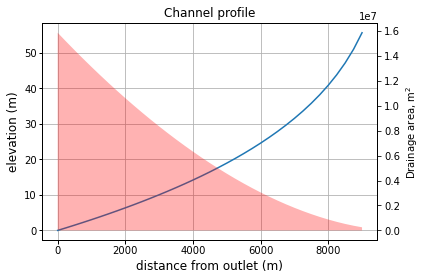

In [7]:
first_channel = ct.channeltoy(spacing=250, U = 0.00025, K = 0.00005, n=1, m= 0.45)
initial_elevation = first_channel.solve_steady_state_elevation()
first_channel.plot_ss_channel(show_figure = True, print_to_file = False,show_area=True)

I am now going to change the uplift and see what the profile looks like:

U is: 0.0005


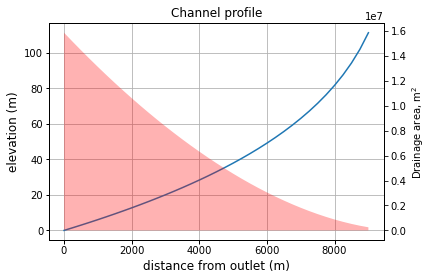

In [4]:
final_elevation = first_channel.set_U_values(U = 0.0005)
first_channel.plot_ss_channel(show_figure = True, print_to_file = False,show_area=True)

We can extract data from channels so we can plot data directly to see what different channels look like. 

Some more parameters:
* `X_0`: the total length of the basin in metres.
* `maximum_x`: the maximum distance of the channel in metres. __IMPORTANT__ this has to be less than `X_0`!!

You can also set the exponent realting length and drainage area (see lesson 01). In this model we use `rho` for this. The default is 1.8, which is a fairly reasonable number, so you don't need to change it. 

K is: 5e-05
U is: 0.0001
K is: 5e-05
U is: 0.0002


Text(0, 0.5, 'elevation (m)')

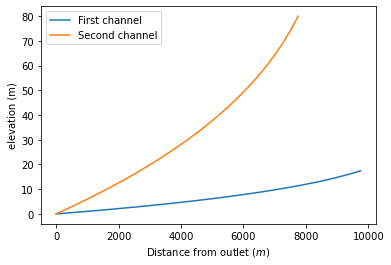

In [8]:
# Set up a first and second channel
first_channel = ct.channeltoy(spacing=250, U = 0.0001, K = 0.00005, n=1, m= 0.45,maximum_x = 10000,X_0 = 12000)

# I show here the setting of steady state but actually this happens automatically when you make a channel. 
initial_elevation = first_channel.solve_steady_state_elevation()

second_channel = ct.channeltoy(spacing=250, U = 0.0002, K = 0.00005, n=1, m= 0.4,maximum_x = 8000,X_0 = 9000)
second_channel.solve_steady_state_elevation() # This isn't really necessary but showing you how to reset a channel to steady state

# Get the data from the two channels
x1 = first_channel.x_data
z1 = first_channel.z_data
x2 = second_channel.x_data
z2 = second_channel.z_data

# Plot the channels
plt.plot(x1,z1,label="First channel")
plt.plot(x2,z2,label="Second channel")
plt.legend()

plt.xlabel("Distance from outlet ($m$)")
plt.ylabel("elevation (m)")

__Task:__ Play around with the parameters above to get a feeling for how much relief is generated for different erodibilites and uplift rates. 

__Question__: Set $n$ = 1 and $m$ = 0.45. Use an uplift rate of 0.0005 m/yr and 0.0002 m/yr. What are values of K that give realistic relief? You can go on Google earth to see how long channels are in big mountain ranges and how much releif they have. 

## Further reading

Howard, A.D., Kerby, G., 1983. Channel changes in badlands. GSA Bulletin 94, 739–752. https://doi.org/10.1130/0016-7606(1983)94<739:CCIB>2.0.CO;2


Whipple, K.X., Tucker, G.E., 1999. Dynamics of the stream-power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs. Journal of Geophysical Research: Solid Earth 104, 17661–17674. https://doi.org/10.1029/1999JB900120

Whipple, K.X., DiBiase, R.A., Crosby, B.T., 2013. Bedrock Rivers. Treatise on Geomorphology 550–573. https://doi.org/10.1016/B978-0-12-374739-6.00254-2

